In [39]:
## Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px
## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve


In [40]:
df = pd.read_csv(r'F:\DataCoSupplyChainDataset.csv\DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [42]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


**Data Cleaning**

In [44]:
df.duplicated().sum()

0

In [45]:
# df.corr()


In [46]:
missing_values = df.isnull().sum()
print(missing_values)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


**Dropping unnecessary columns**

In [47]:
df = df.drop(['Customer Email'
, 'Customer Fname'
, 'Customer Lname'
,'Product Status'
,'Customer Password'
,'Customer Street'
,'Customer Fname'
,'Customer Lname'
,'Latitude'
,'Longitude'
,'Product Description'
,'Product Image'
,'Order Zipcode'
,'shipping date (DateOrders)'], axis=1)

In [48]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [49]:
#Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [50]:
df = df.drop(['order date (DateOrders)'], axis=1)

In [51]:
#Fill Null in Customer Zipcode
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)

In [52]:
#Days of Late
df['late_days'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
df['late_days']

0        -1
1         1
2         0
3        -1
4        -2
         ..
180514    0
180515    1
180516    1
180517   -1
180518    0
Name: late_days, Length: 180519, dtype: int64

In [53]:
df.shape

(180519, 45)

**Data Visualization**

In [54]:
df.select_dtypes(include='float64').nunique()

Benefit per order           21998
Sales per customer           2927
Customer Zipcode              996
Order Item Discount          1017
Order Item Discount Rate       18
Order Item Product Price       75
Order Item Profit Ratio       162
Sales                         193
Order Item Total             2927
Order Profit Per Order      21998
Product Price                  75
dtype: int64

In [55]:
numer_col= df.select_dtypes(include=['int64','float64'])

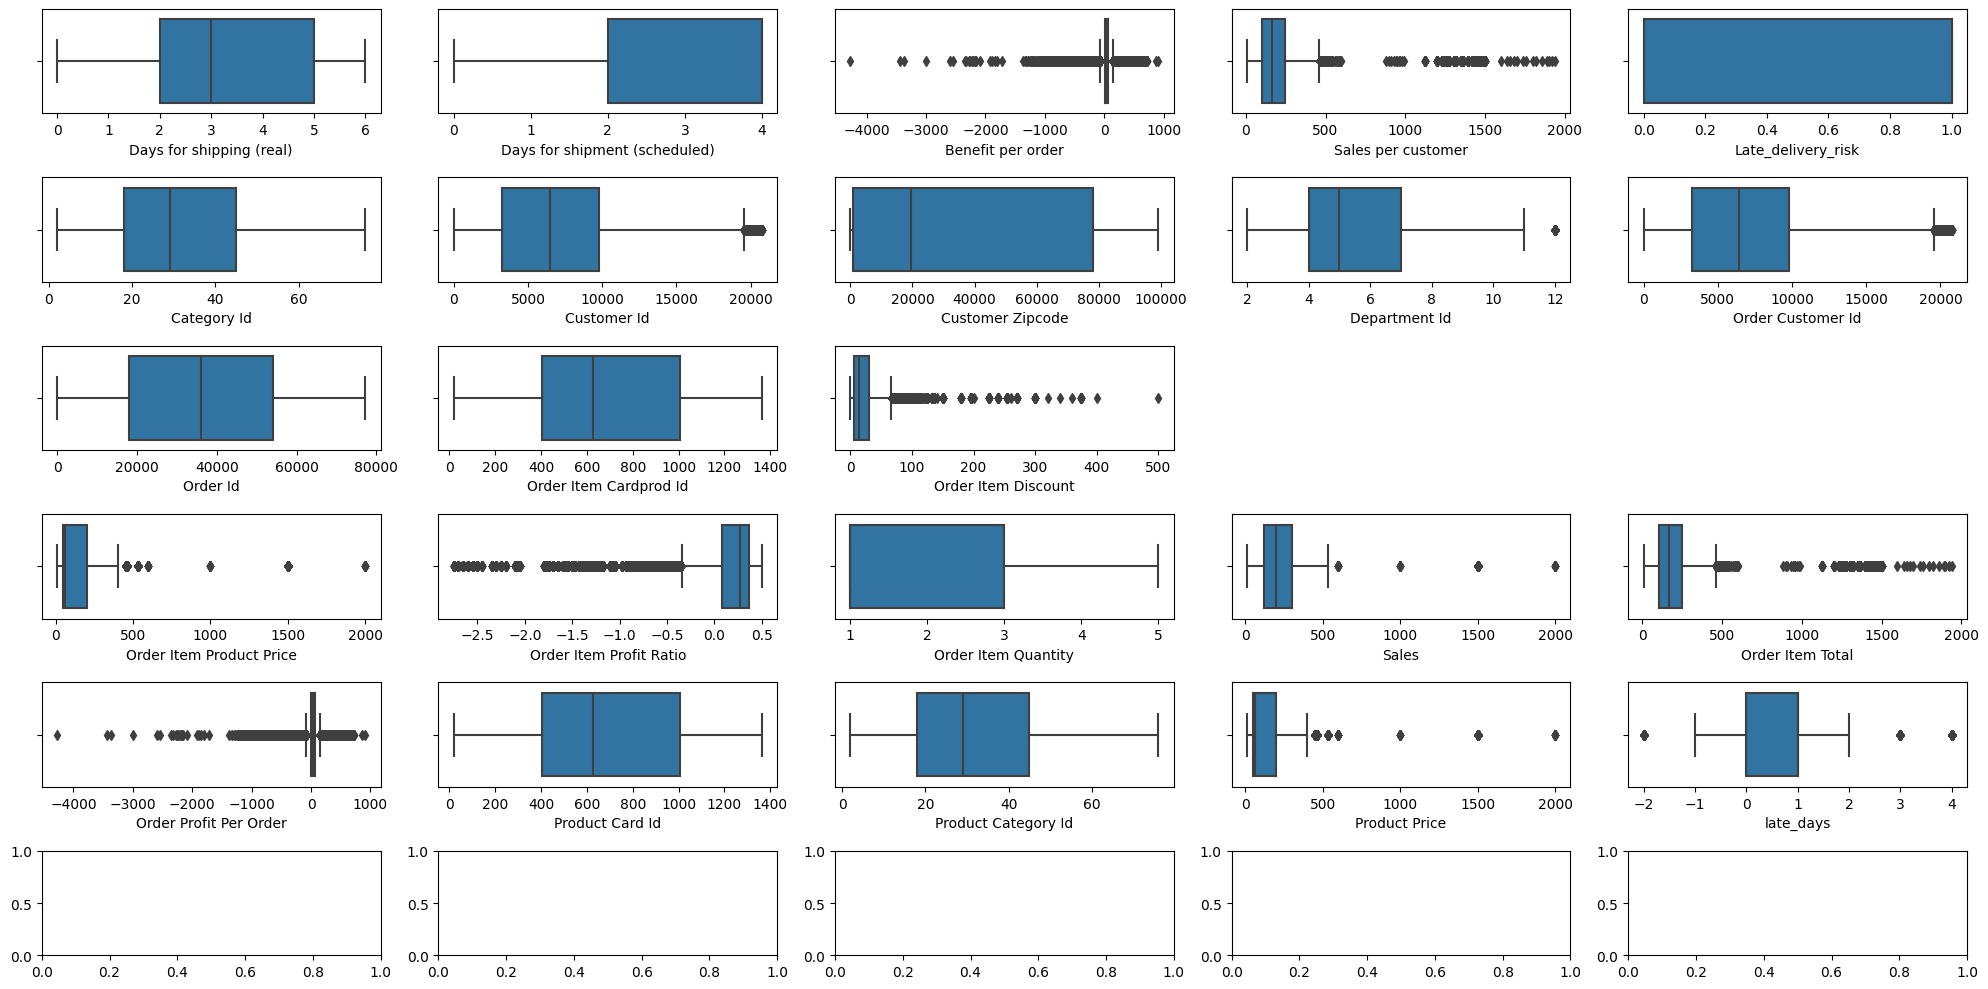

In [56]:
num_vars= numer_col.columns.tolist()
# num_vars = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer',
#             'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode',
#             'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
#             'Defect rates']

fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

In [57]:
len(num_vars)

25

In [58]:
num_vars

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'late_days']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [60]:
def remove_outliers(y, f):
    Q1 = y[f].quantile(0.25)
    Q3 = y[f].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(y[f] >= lower_bound) and (y[f] <= upper_bound)]

col=['Benefit per order','Sales per customer','Customer Id','Department Id','Order Customer Id','Order Item Discount','Order Item Product Price','Order Item Profit Ratio','Sales','Order Item Total','Order Profit Per Order','Product Price','late_days']
# List to store filtered DataFrames for each column
filtered_dfs = []
filtered_df= df
# Iterate over each column in the DataFrame
for column in col:
    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df= filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
#     df= df.drop([column],axis=1)
#     filtered_df = remove_outliers(filtered_df, column)
#     filtered_dfs.append(filtered_df)

# Concatenate filtered DataFrames along the columns axis
# filtered_df_combined = pd.concat([df,filtered_dfs], axis=1)

print(filtered_df.shape)

(97991, 45)


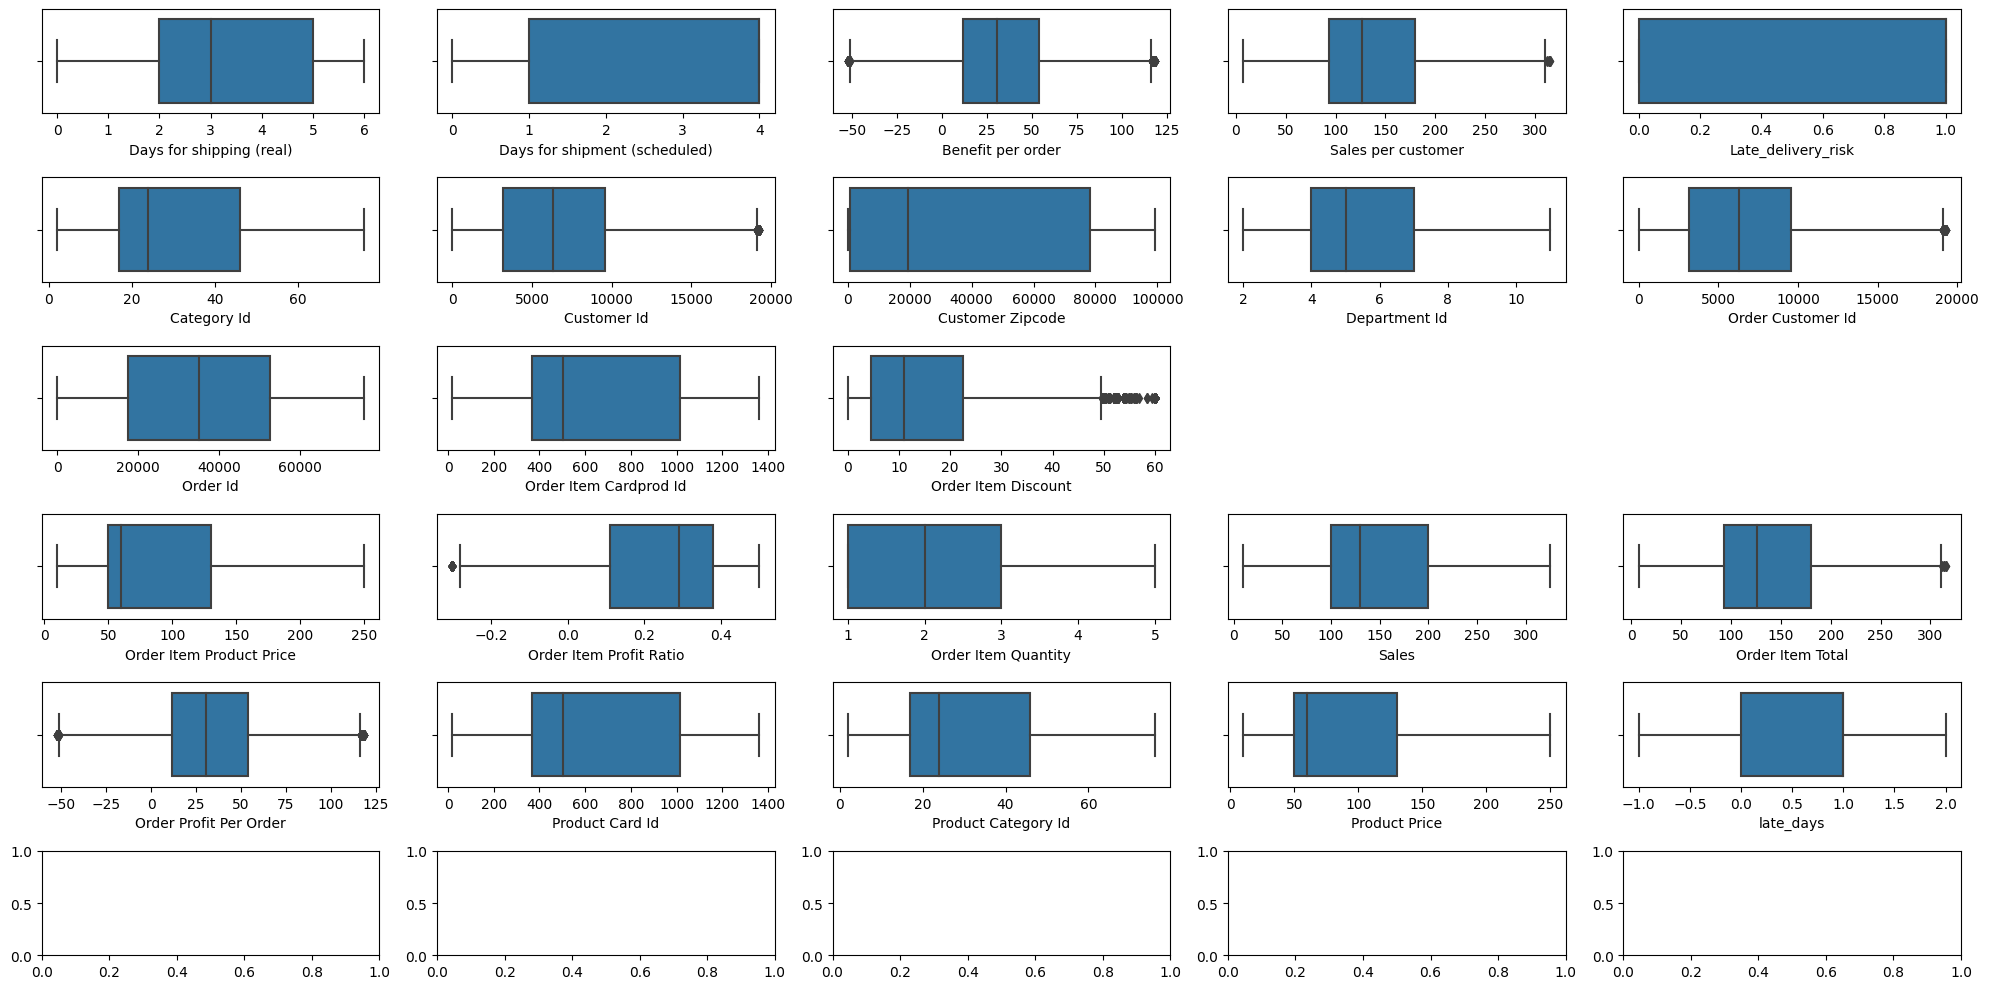

In [61]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=filtered_df, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

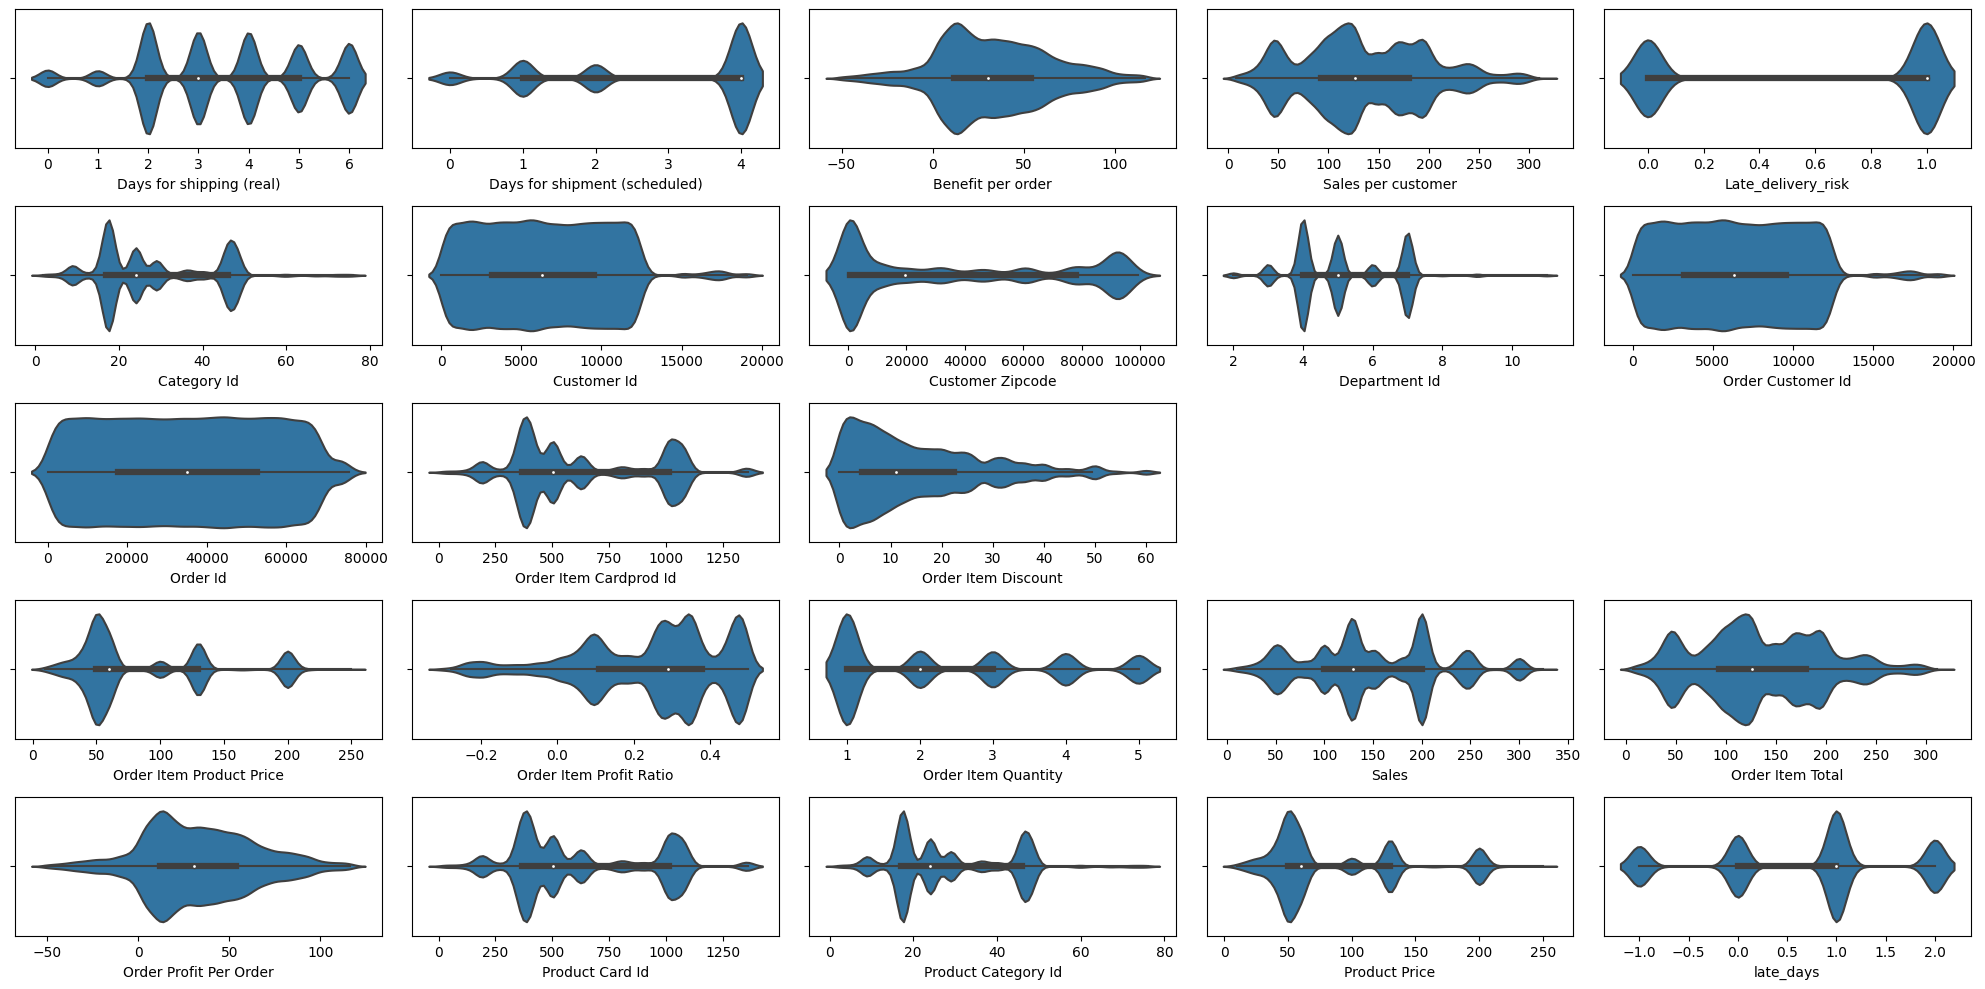

In [63]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=filtered_df, ax=axs[i])

# remove the 14th subplot
fig.delaxes(axs[13])
# remove the 15th subplot
fig.delaxes(axs[14])

fig.tight_layout()
plt.show()

In [88]:
filtered_df['Late_delivery_risk'].value_counts()

Late_delivery_risk
1    57840
0    40151
Name: count, dtype: int64

<Axes: ylabel='count'>

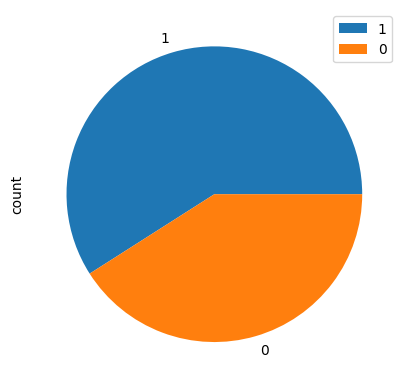

In [64]:
#Check proportion of Late Delivery Risk
filtered_df['Late_delivery_risk'].value_counts().plot.pie(legend = ["0", "1"])

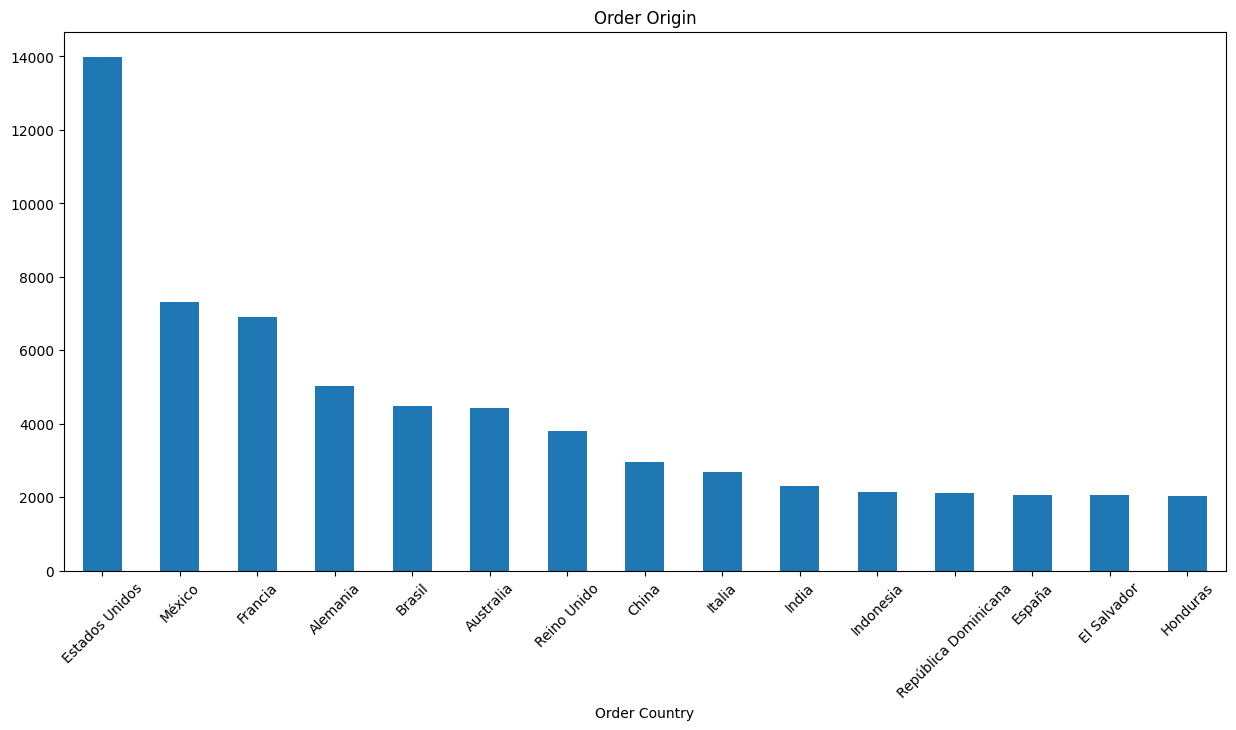

In [65]:
#Check Order Country and Market
top_15_countries = filtered_df['Order Country'].value_counts().nlargest(15)
plt.figure(figsize=(15, 7))
top_15_countries.plot(kind='bar', title="Order Origin")
plt.xticks(rotation=45)
plt.show()

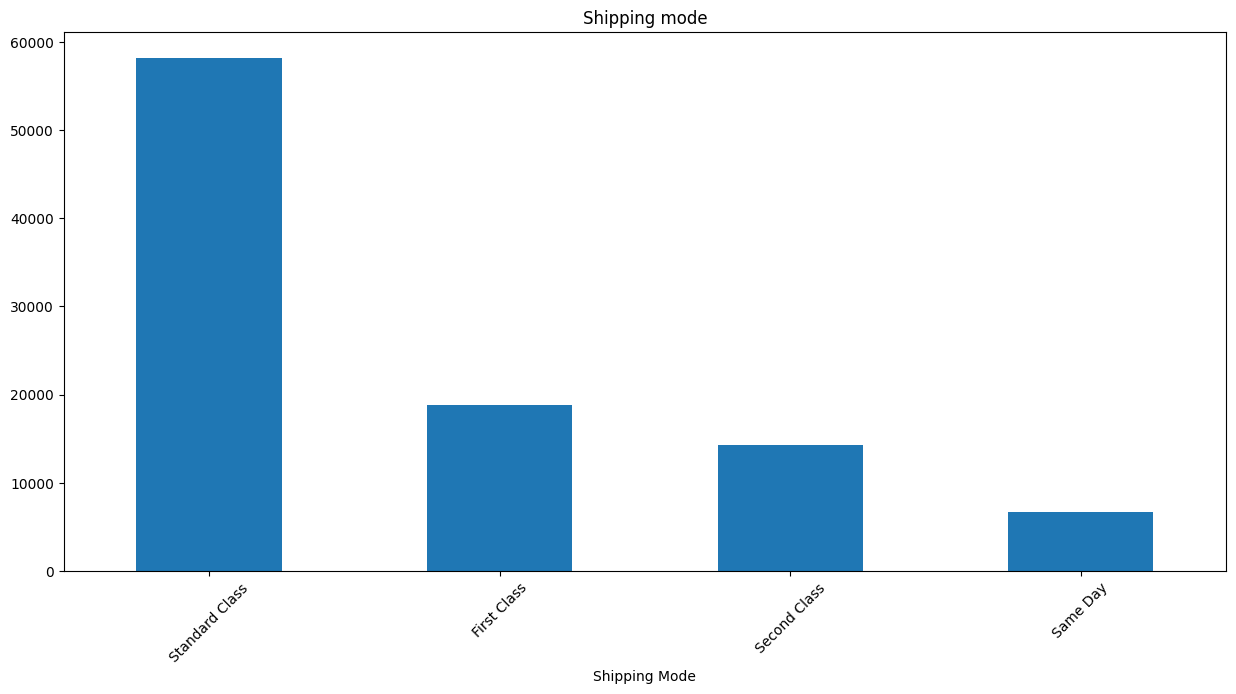

In [66]:
#Shipping Mode
shipping_mode = filtered_df['Shipping Mode'].value_counts()
plt.figure(figsize=(15, 7))
shipping_mode.plot(kind='bar', title="Shipping mode")
plt.xticks(rotation=45)
plt.show()

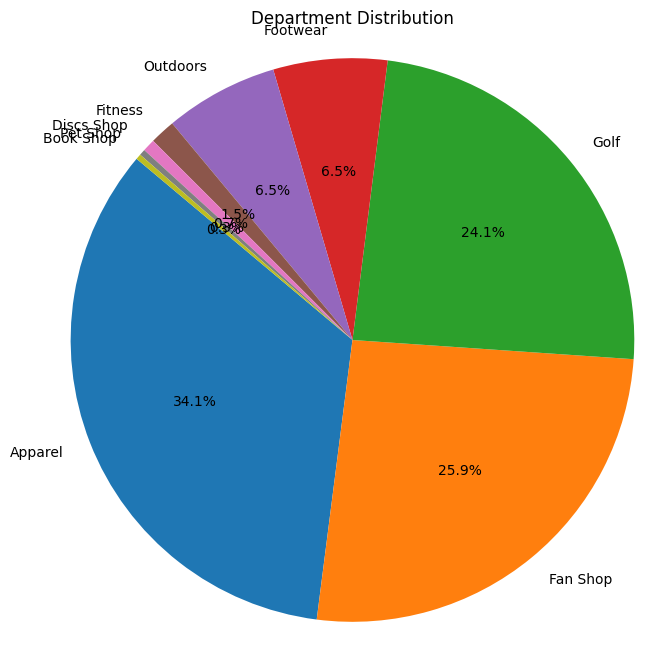

In [67]:
#Check Department of Goods
department_counts = filtered_df['Department Name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Department Distribution")
plt.show()

**Neural Networks Predicting Late Risk**

In [68]:
#Variable Selection and Encode
filtered_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Shipping Mode', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'late_days'],
      dtype='object')

In [69]:
train_df = filtered_df.copy()
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Disco

In [70]:
#Encode all Categorical Object Variables
label_encoder = LabelEncoder()
columns_to_encode = ['Type'
 , 'Category Name'
 , 'Customer City'
 , 'Customer Country'
 , 'Customer Segment'
 , 'Customer State'
 ,'Delivery Status'
 , 'Department Name'
 , 'Market'
 , 'Order City'
 , 'Order Country'
 , 'Order Region'
 , 'Order State'
 , 'Order Status'
 , 'Product Name'
 , 'Shipping Mode']
for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column])

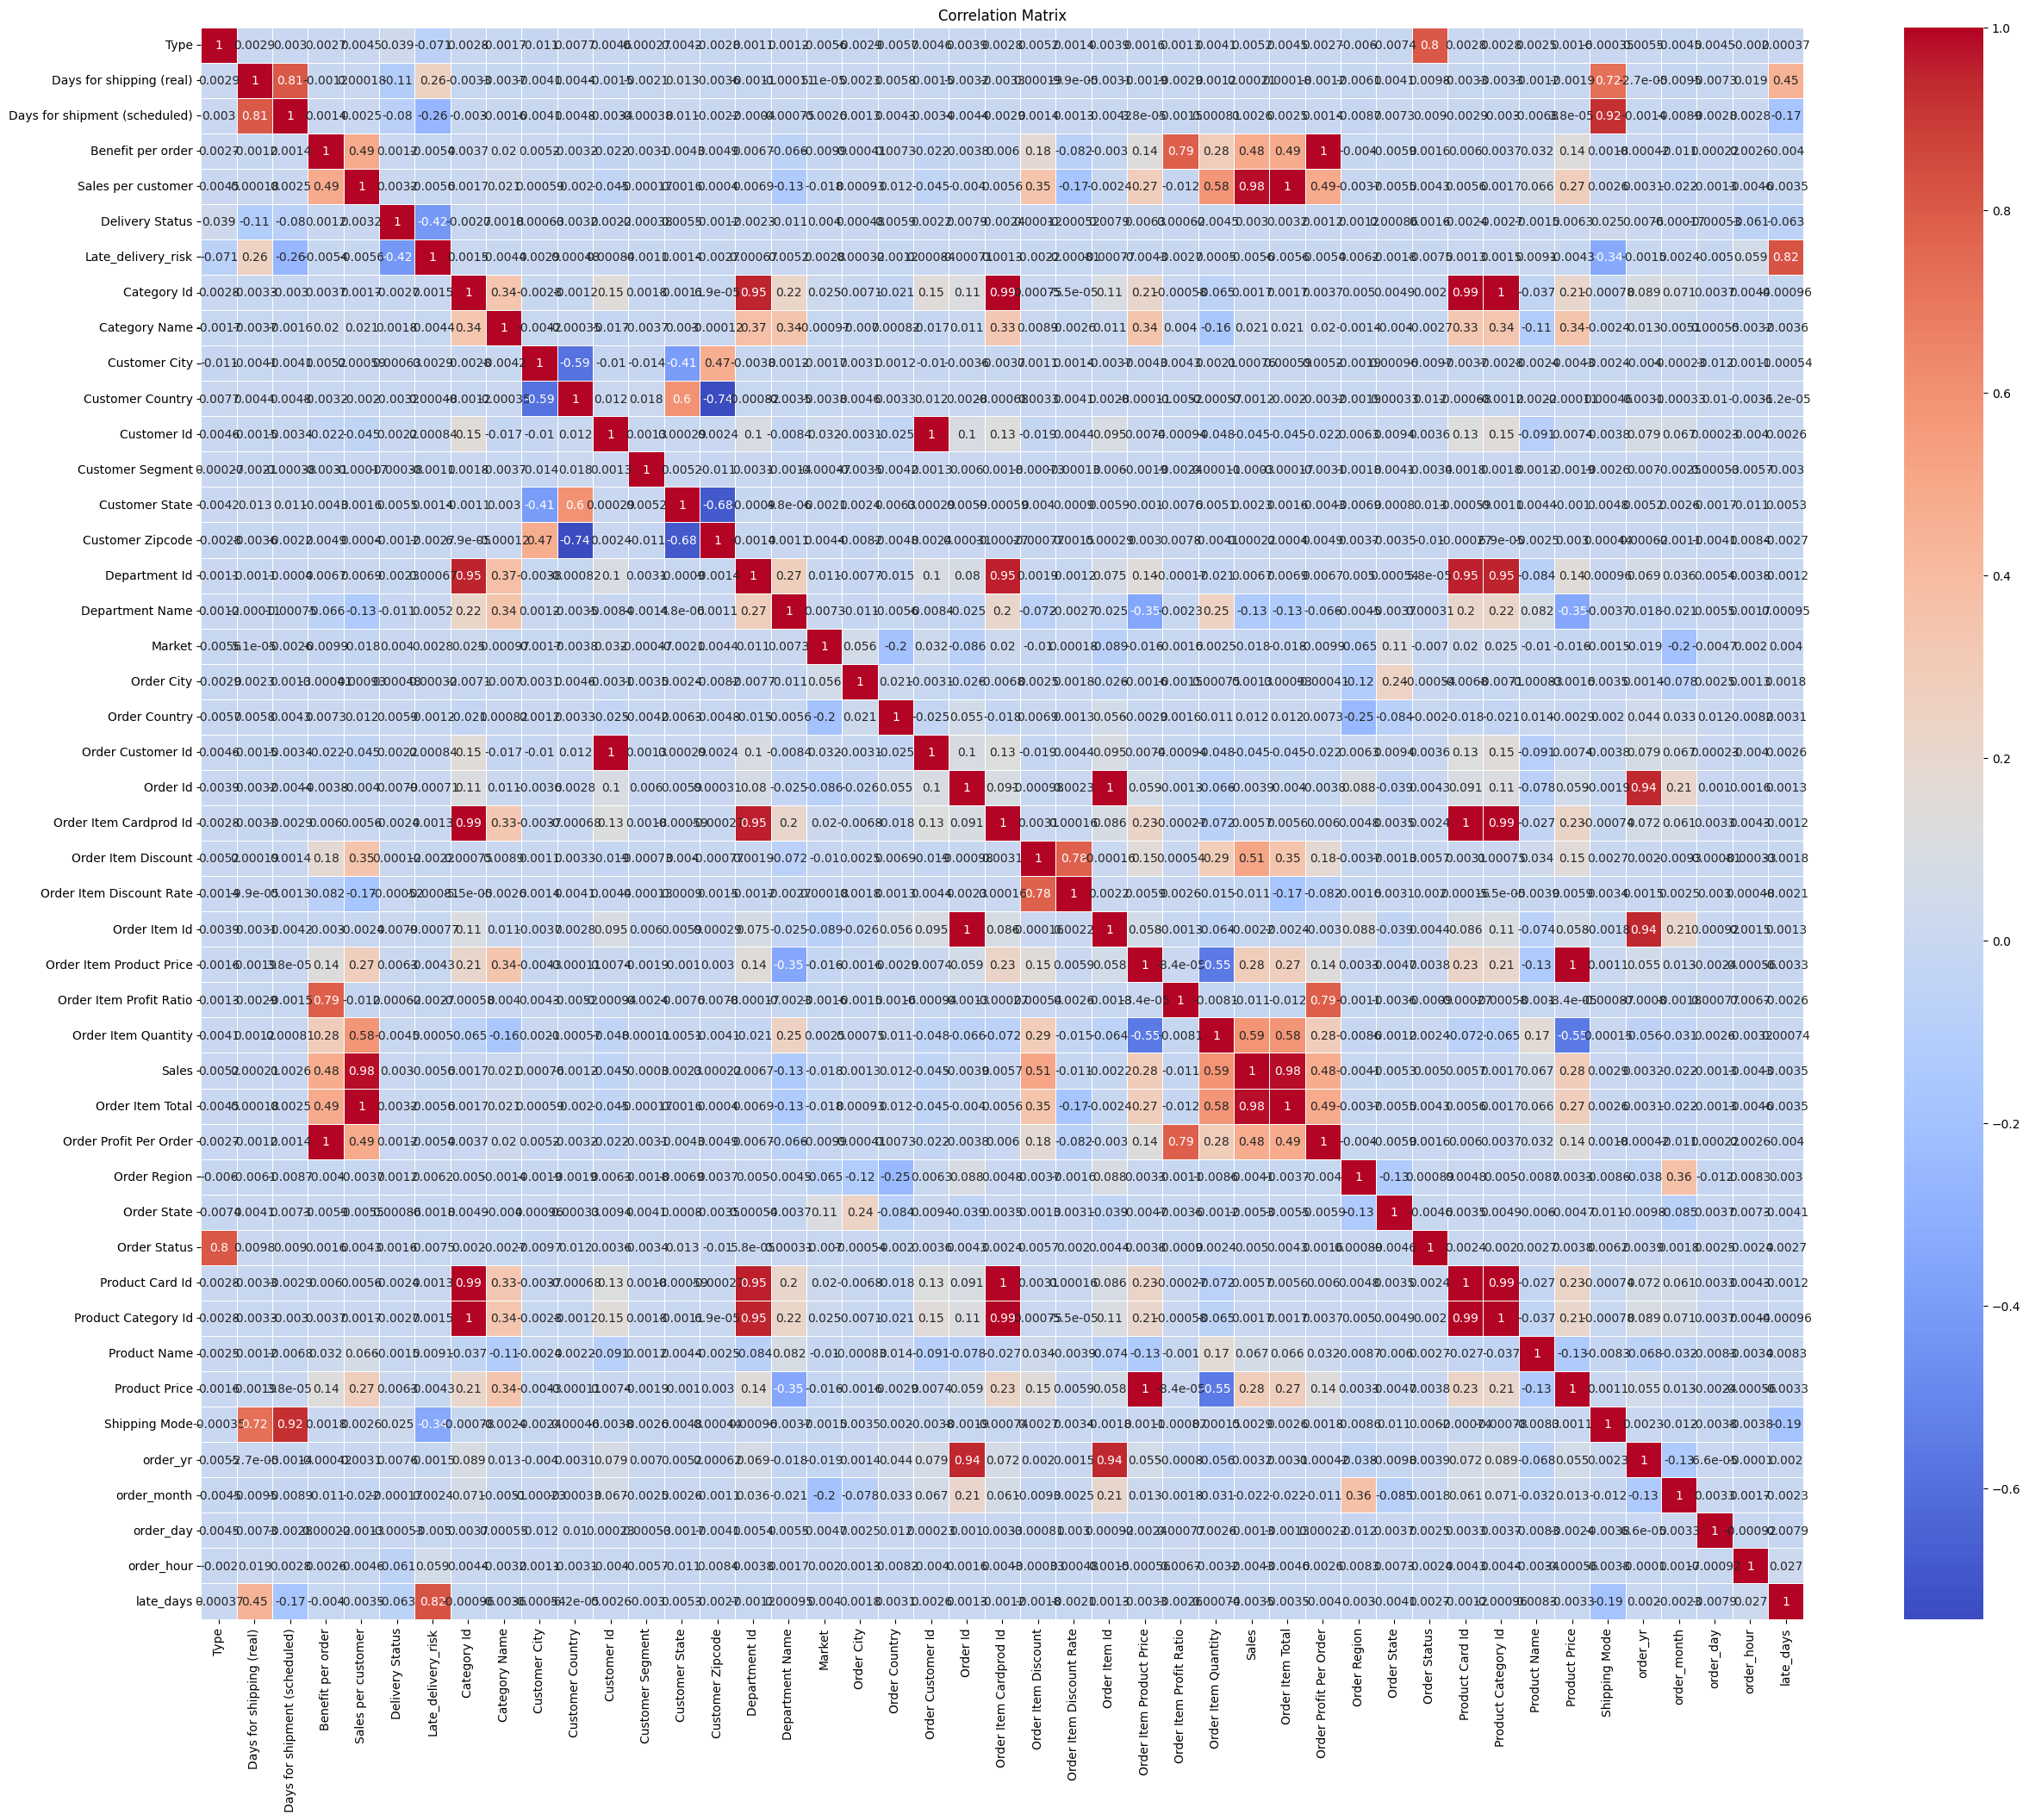

In [71]:
#Correlation Matrix
correlation_matrix = train_df.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [78]:
#Choosing predictors and outcome
#Drop "Days for shipping (real)", "Days for shipment (scheduled)" as already created late_days column
train_df= train_df.drop(["Days for shipping (real)", "Days for shipment (scheduled)", "Delivery Status"],axis=1)

In [89]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

In [73]:
X = train_df.drop(columns=['Late_delivery_risk'])
y = train_df['Late_delivery_risk']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf= RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
# best_rf_classifier = grid_search.best_estimator_

# # Make predictions on the test data using the best model
# y_pred = best_rf_classifier.predict(X_test)

# # Calculate the accuracy of the best model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [90]:
#Using Random Forest to figure which variable to select for predictors
# Create a Random Forest classifier for feature selection
rf = RandomForestClassifier(n_estimators=45, random_state=42)
# Fit the classifier to your data for feature selection
X = train_df.drop(columns=['Late_delivery_risk'])
y = train_df['Late_delivery_risk']
smote = SMOTEENN(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
rf.fit(X_smote, y_smote)
# Use feature importances to select the top N features
num_features_to_select = 5
selector = SelectFromModel(rf, max_features=num_features_to_select)
selector.fit(X_smote, y_smote)
# Get the selected feature indices and feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_smote.columns[selected_feature_indices]
# Select only the top features
X_new = X_smote[selected_feature_names]
X_new.columns

Index(['Order Status', 'Shipping Mode', 'late_days'], dtype='object')

In [91]:
predictors = X_new
outcome = y_smote
# Split the data for training and validation
train_X, valid_X, train_y, valid_y = train_test_split(predictors, outcome, test_size=0.4, random_state=0)

In [92]:
# train neural network with 3 hidden nodes *
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X_scaled, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [93]:
# training performance
classification_report(train_y, clf.predict(train_X))
# validation performance
classification_report(valid_y, clf.predict(valid_X))

C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



'              precision    recall  f1-score   support\n\n           0       0.70      0.96      0.81     16870\n           1       0.91      0.49      0.63     13859\n\n    accuracy                           0.75     30729\n   macro avg       0.80      0.72      0.72     30729\nweighted avg       0.79      0.75      0.73     30729\n'

In [94]:
#Make predictions on the train data
predictions = clf.predict(train_X)
# Calculate Recall
recall = recall_score(train_y, predictions)
# Calculate F1-Score
f1 = f1_score(train_y, predictions)
# Calculate ROC AUC
roc_auc = roc_auc_score(train_y, clf.predict_proba(train_X)[:, 1])
# Display the results
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

Recall: 0.4871606749816581
F1-Score: 0.6329636808490356
ROC AUC: 0.9059047368888948


C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names



In [95]:
#Make predictions on the validation data
predictions = clf.predict(valid_X)
# Calculate Recall
recall = recall_score(valid_y, predictions)
# Calculate F1-Score
f1 = f1_score(valid_y, predictions)
# Calculate ROC AUC
roc_auc = roc_auc_score(valid_y, clf.predict_proba(valid_X)[:, 1])
# Display the results
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

Recall: 0.48748105923948337
F1-Score: 0.6346045463084726
ROC AUC: 0.9072887138837062


C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

C:\Users\DHANUSH PITTALA\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but MLPClassifier was fitted without feature names

